# Regressão Logística

Vamos utilizar 2 Datasets diferentes.

O primeiro conjunto de dados pode ser encontrado originalmente no Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv). É um conjunto de dados sobre fraudes em Cartões de Crédito, utilizaremos ele dos exercícios 1 ao 10.

O segundo conjunto de dados é bem famoso para quem começa na área de Machine Learning, o Fashion MNIST, um conjunto de dados de fotos de roupas em 28x28 pixeis, em preto e branco. Para saber um pouco sobre ele também pode ser lido no [Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

# Regressão Logística Binária



Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito. Utilize o seguinte link para baixá-lo:

[Credit Card Dataset](https://drive.google.com/file/d/1vKviIsxxsEPzfo7RR308_3cMboJGUijh/view?usp=drive_link)

Esse conjunto de dados possui as variáveis:

* **distance_from_home**: distância entre a casa e o local onde a transação foi feita.
* **distance_from_last_transaction**: a distância do local em que a última transação ocorreu.
* **ratio_to_median_purchase_price**: Razão entre preço da transação e o preço médio de transação.
* **repeat_retailer**: Se a transação ocorreu na mesma loja.
* **used_chip**: Se a transação foi feita com cartão de crédito.
* **used_pin_number**: Se a transação ocorreu usando número PIN.
* **online_order**: Se a transação foi online.
* **fraud**: Se a transação é fraudulenta.


## 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

In [ ]:
# Selecionar as variáveis

variaveis_selecionadas = ['distance_from_home','distance_from_last_transaction', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
df_selecionado = df[variaveis_selecionadas]

In [ ]:
# verificando a correlação linear
df_selecionado.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [ ]:
df_selecionado.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000


## 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

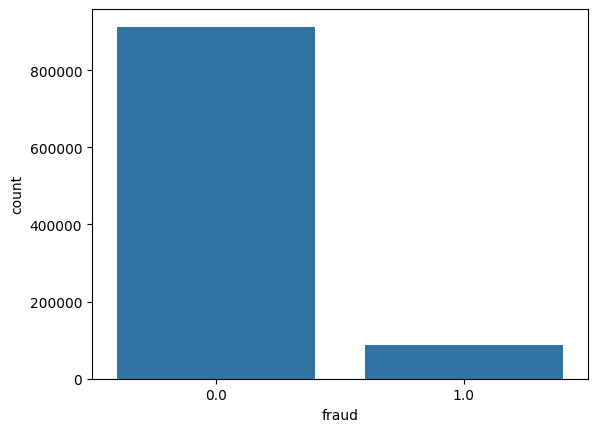

In [ ]:
sns.countplot(x=df['fraud']);

Se as classes estiverem desbalanceadas execute o código a seguir:

*obs: Este é um pseudo código genérico, talvez você tenha que trocar o nome do DataFrame, ou mesmo das colunas*

```py
# separando as variáveis X e y
X = df_variaveis[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y = df_variaveis['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)
```

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

Busque saber mais sobre undersampling e oversampling para executar bem o seu código!

In [ ]:
# Separar as variáveis x e y
X = df.drop('fraud', axis=1)
y = df['fraud']

# Balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X, y = undersample.fit_resample(X, y)

from imblearn.over_sampling import RandomOverSampler
#oversample = RandomOverSampler()
#X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

## 4: Crie um modelo de regressão logística.

In [ ]:
X = sm.add_constant(X)

In [ ]:
X

,const,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,1.0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,1.0,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,1.0,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,1.0,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,1.0,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
999995,1.0,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,1.0,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,1.0,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,1.0,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [ ]:
model = sm.Logit(y, X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.5423
Time:                        00:44:31   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -10.3611      0.044   -237.200    

## 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [ ]:
# Resumo do modelo
model.params

const                            -10.361061
distance_from_home                 0.015217
distance_from_last_transaction     0.025258
ratio_to_median_purchase_price     0.862251
repeat_retailer                   -0.621471
used_chip                         -1.049060
used_pin_number                  -13.740402
online_order                       6.651379
dtype: float64

## 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [ ]:
# criando modelo de regressão logística
y_pred = model.predict(X)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
matriz_confusao = confusion_matrix(y, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[906272,   6325],
       [ 34837,  52566]])

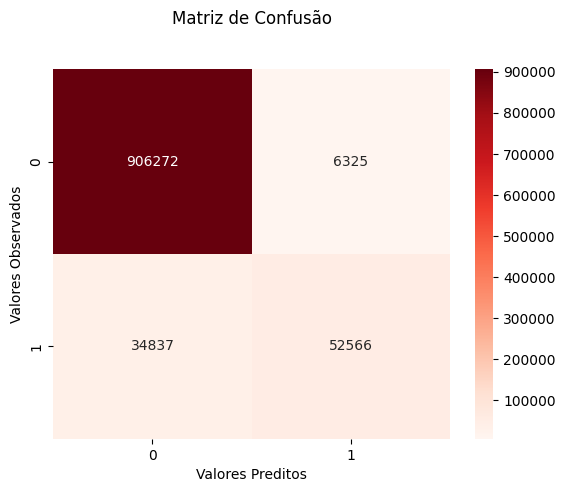

In [ ]:
# Criando um mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão', y=1.1)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Observados');

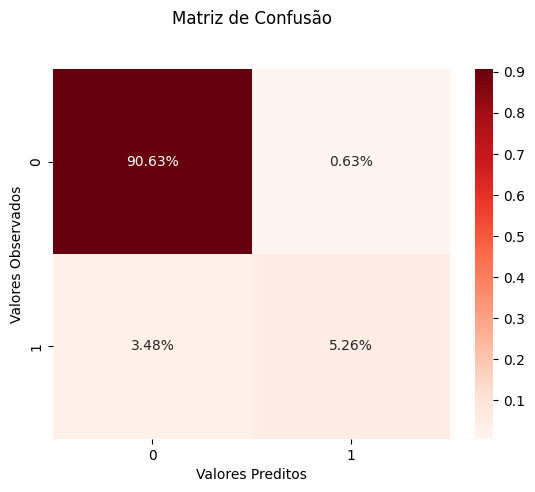

In [ ]:
# Mapa de calor observando os valores percentuais.
sns.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Reds')

plt.title('Matriz de Confusão', y=1.1)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Observados');

## 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [ ]:
# Verificando as métricas: sensibilidade, especificidade e f1-score
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



**Resposta:** Podemos ver que a acurária é de 93%, indicando que o modelo acerta 93% da previsões. Note também que ele se sai razoavelmente bem nas duas categorias, indicando que o modelo está bom.

## 8: Crie a curva ROC para este modelo.

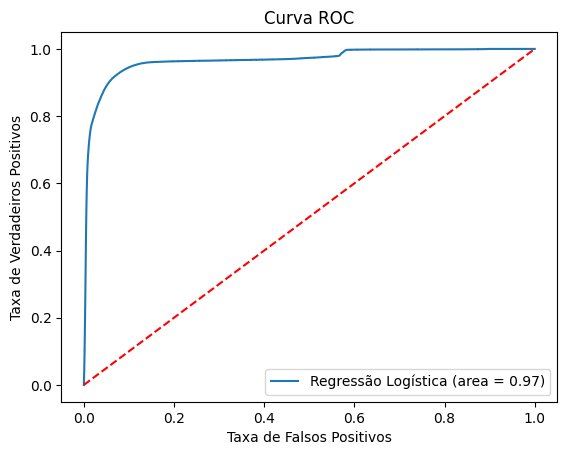

In [ ]:
# Criar um gráfico da curva ROC com as funções roc_curve e roc_auc_score do módulo metrics do scikit-learn
from sklearn.metrics import roc_curve, roc_auc_score

modelo_roc_auc = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict(X))

plt.plot(fpr, tpr, label=f'Regressão Logística (area = {round(modelo_roc_auc, 2)})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Resposta:** Quanto mais próximo de 1 a área sob a curva ROC estiver, melhor o modelo. No nosso caso a área é de 0.97, indicando que o modelo está muito bom.

## 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [ ]:
lista = [1, 82, 13, 14, 1, 0, 1, 1]

model.predict(lista)

array([0.01184557])

## 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema. Caso ocorra, escreva sobre o problema encontrado.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema. Caso ocorra, escreva sobre o problema encontrado.

# Carregar os dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_card_transdata.csv')

# Selecionar as variáveis
variaveis_selecionadas = ['distance_from_home', 'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order','fraud']
df_selecionado = df[variaveis_selecionadas]

In [ ]:
# Criar o modelo de regressão logística
modelo = logit('fraud ~ distance_from_home + ratio_to_median_purchase_price + repeat_retailer + used_chip + used_pin_number + online_order', data=df)
resultado = modelo.fit()

# Verificar os parâmetros do modelo
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.143020
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999993
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                  0.5176
Time:                        00:54:17   Log-Likelihood:            -1.4302e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -9.6681      0.041   -234.708    

In [ ]:
# Assuming 'df_selecionado' contains the correct data for prediction
X = df_selecionado.drop('fraud', axis=1)  # Remove the target variable from the features
y = df_selecionado['fraud']  # Extract the target variable

# Criar a matriz de confusão
y_pred = (resultado.predict(df_selecionado) >= 0.5).astype(int)
matriz_confusao = confusion_matrix(y, y_pred)
print(matriz_confusao)

[[906912   5685]
 [ 36815  50588]]


In [ ]:
# Verificar as outras métricas
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.90      0.58      0.70     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.79      0.84   1000000
weighted avg       0.96      0.96      0.95   1000000



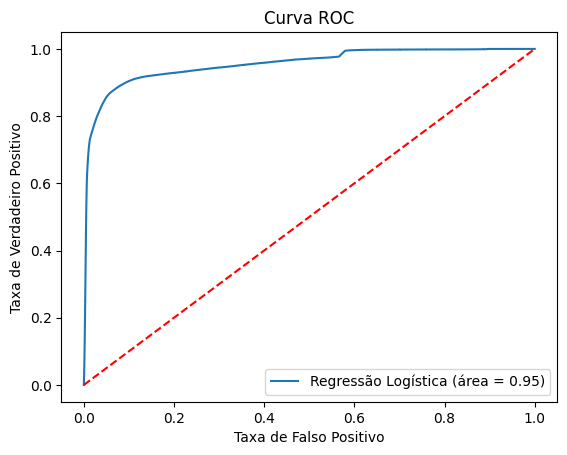

In [ ]:
# Criar a curva ROC
logit_roc_auc = roc_auc_score(y, resultado.predict(X))
fpr, tpr, thresholds = roc_curve(y, resultado.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

In [ ]:
# Prever se uma transação é fraude
lista = [1, 82, 13, 14, 1, 0, 1, 1]

model.predict(lista)

# Problema encontrado:
# Quando o balanceamento de classe não é realizado, o modelo fica enviesado para a classe majoritária (não fraude). Isso pode ser visto na matriz de confusão,
# onde a maioria dos valores está na diagonal principal (não fraude). Isso significa que o modelo está classificando a maioria das transações como não fraude, mesmo que algumas delas sejam fraude.

array([0.01184557])